In [319]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


     -------------------------------------- 43.3/43.3 kB 524.0 kB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
import os
import glob
from wand.image import Image
import numpy as np
from numpy.random import randint
from numpy import zeros
from numpy import ones
from tensorflow.keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot
from keras import models 

import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize

In [10]:
source_list = glob.glob(r"C:\Users\Vaibhavi\Desktop\OCR\source" + "/*.jpg")

In [10]:
target_list = glob.glob(r"C:\Users\Vaibhavi\Desktop\OCR\target" + "/*.jpg")

In [11]:
source_list

['C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\001.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\002.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\003.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\004.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\005.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\006.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\007.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\008.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\009.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\010.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\011.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\012.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\013.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\014.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\015.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\016.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\017.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\018.jpg',
 'C:\\User

In [12]:
source = []
for k in source_list:
    img = cv2.imread(k)
    source.append(img)

In [7]:
target = []
for j in target_list:
    img = cv2.imread(j)
    target.append(img)

In [13]:
source = np.asarray(source)

In [8]:
target = np.asarray(target)

In [14]:
source.shape

(381, 256, 256, 3)

In [9]:
target.shape

(381, 256, 256, 3)

In [ ]:
index = 100
cv2.imshow('source', source[index])
cv2.imshow('target', target[index])
cv2.waitKey()

In [15]:
source = (source - 127.5) / 127.5
target = (target - 127.5) / 127.5

In [16]:
source[0].min()

-0.6627450980392157

In [17]:
dataset = np.asarray([source, target])

In [18]:
dataset.shape

(2, 381, 256, 256, 3)

In [19]:
dataset

array([[[[[ 0.20784314,  0.23137255,  0.2627451 ],
          [ 0.2       ,  0.22352941,  0.25490196],
          [ 0.2       ,  0.22352941,  0.25490196],
          ...,
          [ 0.23137255,  0.2627451 ,  0.27058824],
          [ 0.24705882,  0.27843137,  0.28627451],
          [ 0.24705882,  0.27843137,  0.28627451]],

         [[ 0.22352941,  0.24705882,  0.27843137],
          [ 0.21568627,  0.23921569,  0.27058824],
          [ 0.22352941,  0.24705882,  0.27843137],
          ...,
          [ 0.23137255,  0.2627451 ,  0.27058824],
          [ 0.24705882,  0.27843137,  0.28627451],
          [ 0.24705882,  0.27843137,  0.28627451]],

         [[ 0.20784314,  0.23137255,  0.2627451 ],
          [ 0.20784314,  0.23137255,  0.2627451 ],
          [ 0.21568627,  0.23921569,  0.27058824],
          ...,
          [ 0.23921569,  0.27058824,  0.27843137],
          [ 0.24705882,  0.27843137,  0.28627451],
          [ 0.25490196,  0.28627451,  0.29411765]],

         ...,

         [[ 0.05

In [2]:
# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=image_shape)
	# target image input
	in_target_image = Input(shape=image_shape)
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model

In [3]:
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g
 
# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g
 
# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

In [19]:
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	for layer in d_model.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False
	# define the source image
	in_src = Input(shape=image_shape)
	# connect the source image to the generator input
	gen_out = g_model(in_src)
	# connect the source input and generator output to the discriminator input
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and classification output
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

In [20]:
def generate_real_samples(dataset, n_samples, patch_shape):
	# unpack dataset
	trainA, trainB = dataset
	# choose random instances
	ix = randint(0, trainA.shape[0], n_samples)
	# retrieve selected images
	X1, X2 = trainA[ix], trainB[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y

In [21]:
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

In [22]:
def summarize_performance(step, g_model, dataset, n_samples=3):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0
	# plot real source images
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realA[i])
	# plot generated target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_fakeB[i])
	# plot real target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realB[i])
	# save plot to file
	filename1 = 'plot_%06d.png' % (step+1)
	pyplot.savefig(filename1)
	pyplot.close()
	# save the generator model
	filename2 = 'model_%06d.h5' % (step+1)
	g_model.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

In [26]:
# train pix2pix model
d1_history = []
d2_history = []
g_history = []
fid_scores = []
fid_dict = {}
def train(d_model, g_model, gan_model, model, dataset, n_epochs=100, n_batch=1):
	# determine the output square shape of the discriminator
	n_patch = d_model.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		[X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		# update discriminator for real samples
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		# update discriminator for generated samples
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		# update the generator
		g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
		# summarize performance
		print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
		d1_history.append(d_loss1)
		d2_history.append(d_loss2)
		g_history.append(g_loss)
		# summarize model performance
		if (i+1) % (bat_per_epo * 10) == 0:
			summarize_performance(i, g_model, dataset)
			fid = calculate_fid(dataset, g_model, model)
			fid_scores.append(fid)
			fid_dict[i+1] = fid

In [23]:
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = np.resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return np.asarray(images_list)

def calculate_fid (dataset, g_model, model):
    source = dataset[0]
    images1 = dataset[1]
    images2 = g_model.predict(source)
    images1 = (images1 + 1) / 2.0
    images2 = (images2 + 2) / 2.0
    images1 = target.astype('float32')
    images2 = images2.astype('float32')
    images1 = scale_images(images1, (299,299,3))
    images2 = scale_images(images2, (299,299,3))
    images1 = preprocess_input(images1)
    images2 = preprocess_input(images2)
    # calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    # calculate mean and covariance statistics
    mu1, sigma1 = np.mean(act1, axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = np.mean(act2, axis=0), np.cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if np.iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

In [27]:
print('Loaded', dataset[0].shape, dataset[1].shape)

Loaded (381, 256, 256, 3) (381, 256, 256, 3)


In [28]:
image_shape = dataset[0].shape[1:]

In [29]:
image_shape

(256, 256, 3)

In [30]:
d_model = define_discriminator(image_shape)

In [31]:
g_model = define_generator(image_shape)

In [32]:
gan_model = define_gan(g_model, d_model, image_shape)

C:\Users\Vaibhavi\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [34]:
train(d_model, g_model, gan_model, model, dataset)

>1, d1[0.506] d2[0.678] g[25.055]
>2, d1[0.309] d2[0.792] g[23.213]
>3, d1[0.501] d2[0.511] g[21.863]
>4, d1[0.483] d2[0.470] g[25.860]
>5, d1[0.387] d2[0.447] g[24.003]
>6, d1[0.337] d2[0.699] g[15.991]
>7, d1[0.424] d2[0.397] g[19.404]
>8, d1[0.400] d2[0.508] g[17.240]
>9, d1[0.447] d2[0.459] g[14.984]
>10, d1[0.439] d2[0.360] g[15.497]
>11, d1[0.481] d2[0.464] g[19.976]
>12, d1[0.525] d2[0.389] g[15.246]
>13, d1[0.428] d2[0.345] g[11.207]
>14, d1[0.342] d2[0.458] g[12.834]
>15, d1[0.387] d2[0.334] g[13.242]
>16, d1[0.385] d2[0.319] g[14.614]
>17, d1[0.394] d2[0.291] g[12.893]
>18, d1[0.360] d2[0.372] g[11.397]
>19, d1[0.382] d2[0.413] g[12.748]
>20, d1[0.425] d2[0.308] g[9.677]
>21, d1[0.308] d2[0.362] g[16.417]
>22, d1[0.319] d2[0.288] g[24.485]
>23, d1[0.328] d2[0.395] g[17.129]
>24, d1[0.391] d2[0.327] g[8.268]
>25, d1[0.550] d2[0.273] g[10.699]
>26, d1[0.247] d2[0.254] g[22.239]
>27, d1[0.271] d2[0.251] g[15.065]
>28, d1[0.254] d2[0.242] g[12.191]
>29, d1[0.490] d2[0.181] g[11.1

# TESTING

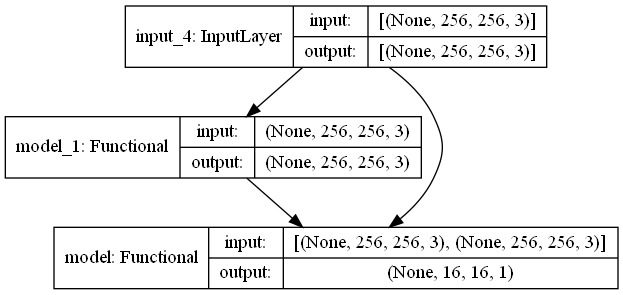

In [326]:
from keras.utils.vis_utils import plot_model
plot_model(gan_model, to_file='gan_model_plot.png', show_shapes=True, show_layer_names=True)

In [45]:
dataset.shape

(2, 381, 256, 256, 3)

In [46]:
dataset.shape[1]

381

In [47]:
source.shape

(381, 256, 256, 3)

In [20]:
model = models.load_model(r"C:\Users\Vaibhavi\sharda+nandinagari models new\model_038100.h5", compile=False)

In [95]:
# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
	images = np.vstack((src_img, gen_img, tar_img))
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	titles = ['Source', 'Generated', 'Expected']
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, 3, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# show title
		pyplot.title(titles[i])
# 	pyplot.show()
	pyplot.savefig('sharda')

In [96]:
ix = [332]
print(ix)
src_image = source[ix]
tar_image = target[ix]
tar_image.shape

[332]


(1, 256, 256, 3)

In [97]:
gen_image = model.predict(src_image)

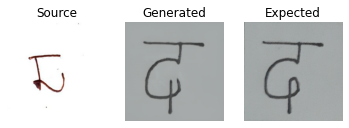

In [98]:
plot_images(src_image, gen_image, tar_image)

In [32]:
src_image.shape

(1, 256, 256, 3)

In [145]:
fid_dict

{3810: 28.282860512698935,
 7620: 25.437206470339383,
 11430: 24.99912963976537,
 15240: 25.60902099631885,
 19050: 24.790634545914216,
 22860: 23.499866389319088,
 26670: 22.81546218776119,
 30480: 21.542401366933195,
 34290: 20.52099784228907,
 38100: 19.69159921000687}

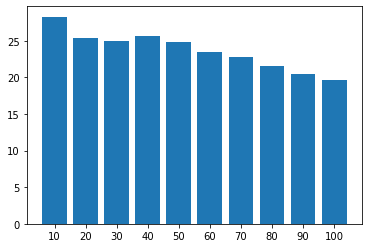

In [153]:
training_steps = list(fid_dict.keys())
epochs = [int(i/381) for i in training_steps]
fid_values = list(fid_dict.values())

pyplot.bar(range(len(fid_dict)), fid_values, tick_label=epochs)
pyplot.show()

In [136]:
def plot_history(d1_history, d2_history, g_history):
    pyplot.subplot(2, 1, 1)
    pyplot.plot(d1_history, label='Discriminator-real')
    pyplot.plot(d2_history, label='Discriminator-fake')
    pyplot.plot(g_history, label='Generator')
    pyplot.legend()
    pyplot.xlabel('Training steps')
    pyplot.ylabel('Loss')
    pyplot.savefig('final_loss_plot.png')
    pyplot.close()
    
plot_history(d1_history, d2_history, g_history)

In [144]:
pyplot.plot(g_history, label='Generator')
pyplot.legend()
pyplot.xlabel('Training steps')
pyplot.ylabel('Binary Crossentropy Loss')
pyplot.savefig('final_Individual_g_loss')
pyplot.close()